<a href="https://colab.research.google.com/github/PeterArbaugh/deep_learning_python/blob/main/ch_4_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

Manual encoding of integer sequences via multi-hot encoding

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
        results[i , j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_text = vectorize_sequences(test_data)

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorize labels

In [17]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Model definition

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [19]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Set aside a validation set

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5320 - accuracy: 0.7730 - val_loss: 0.4107 - val_accuracy: 0.8496
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3202 - accuracy: 0.8989 - val_loss: 0.3156 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2311 - accuracy: 0.9256 - val_loss: 0.2789 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1765 - accuracy: 0.9441 - val_loss: 0.2728 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1398 - accuracy: 0.9554 - val_loss: 0.3170 - val_accuracy: 0.8761
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1181 - accuracy: 0.9623 - val_loss: 0.3179 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0949 - accuracy: 0.9713 - val_loss: 0.3110 - val_accuracy: 0.8838
Epoch 8/20
30

Plot the training and validation loss

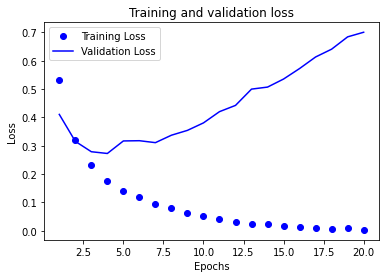

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plot the training and validation accuracy

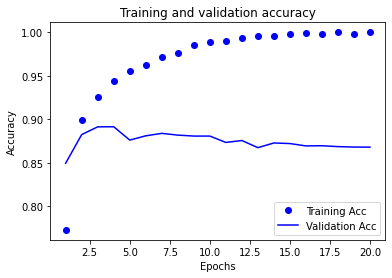

In [23]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()